In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from pylab import rcParams
import warnings
import datetime
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

warnings.filterwarnings("ignore")
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})

In [2]:
df = pd.read_csv('/content/exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [5]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
df.shape

(7588, 2)

In [8]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [9]:
df.date = pd.to_datetime(df.date, format="%d-%m-%Y %H:%M", errors='coerce') #converting date into datetime
df = df.replace('ND', np.NaN)
df = df.dropna(axis=0)
df.Ex_rate = pd.to_numeric(df.Ex_rate, errors='coerce') #converting columns to float64
df.date= pd.to_numeric(df.date, errors='coerce') #converting columns to float64
df

,date,Ex_rate
0,631152000000000000,0.785500
1,631238400000000000,0.781800
2,631324800000000000,0.786700
3,631411200000000000,0.786000
4,631497600000000000,0.784900
...,...,...
7583,1286323200000000000,0.718494
7584,1286409600000000000,0.721839
7585,1286496000000000000,0.723197
7586,1286582400000000000,0.720825


Data Visualization:

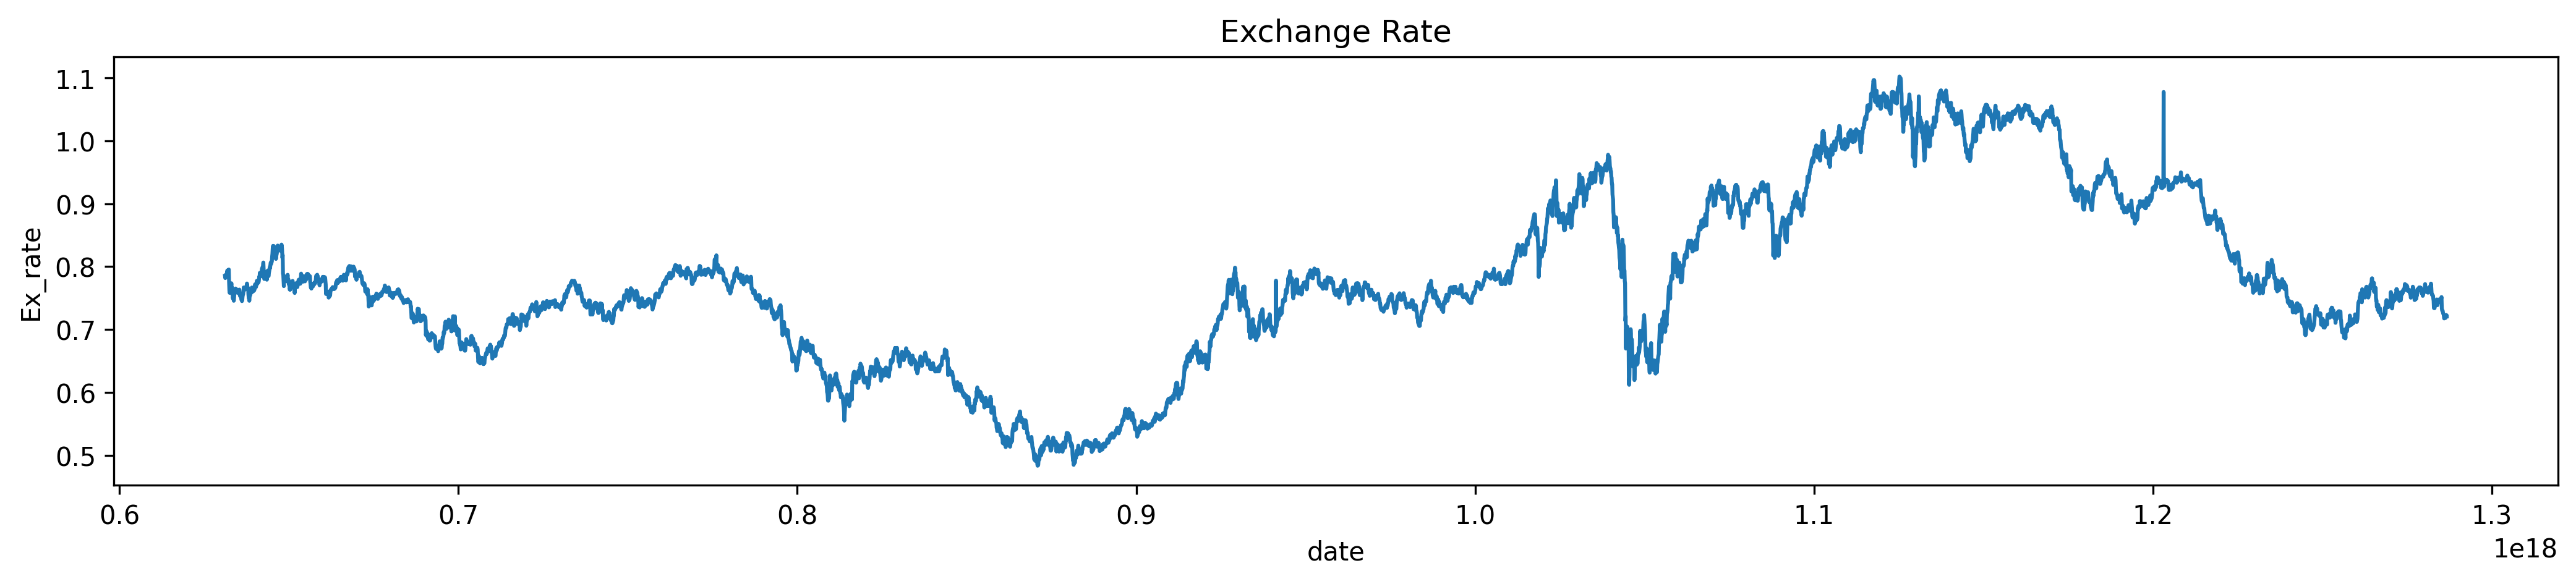

In [10]:
plt.plot(df.date,df.Ex_rate)
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.title('Exchange Rate')
plt.show()

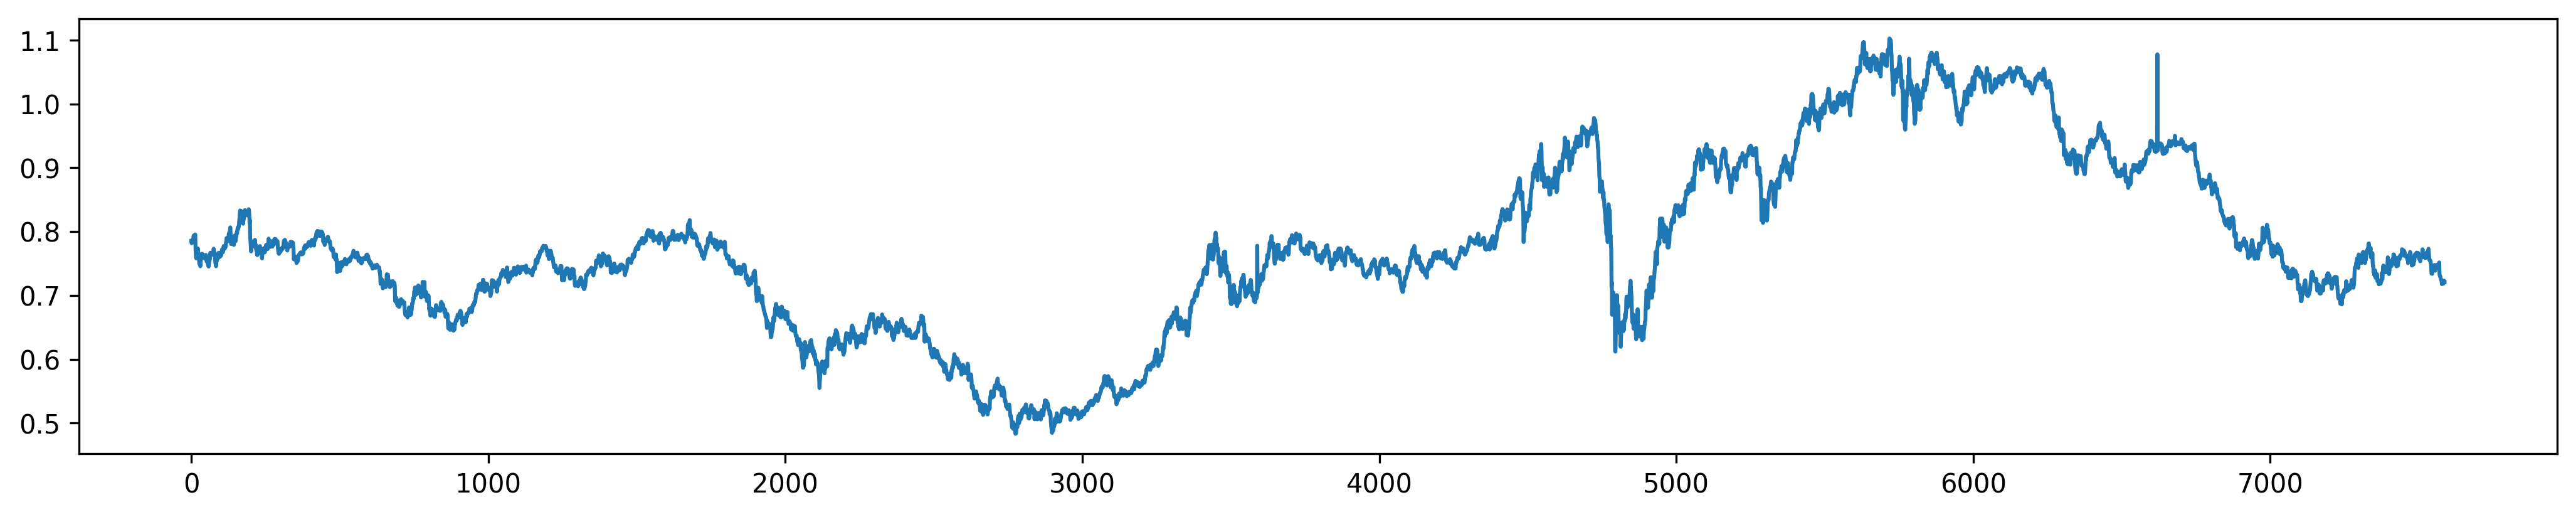

In [11]:
df_ex_rate = df[['Ex_rate']]
plt.plot(df_ex_rate)

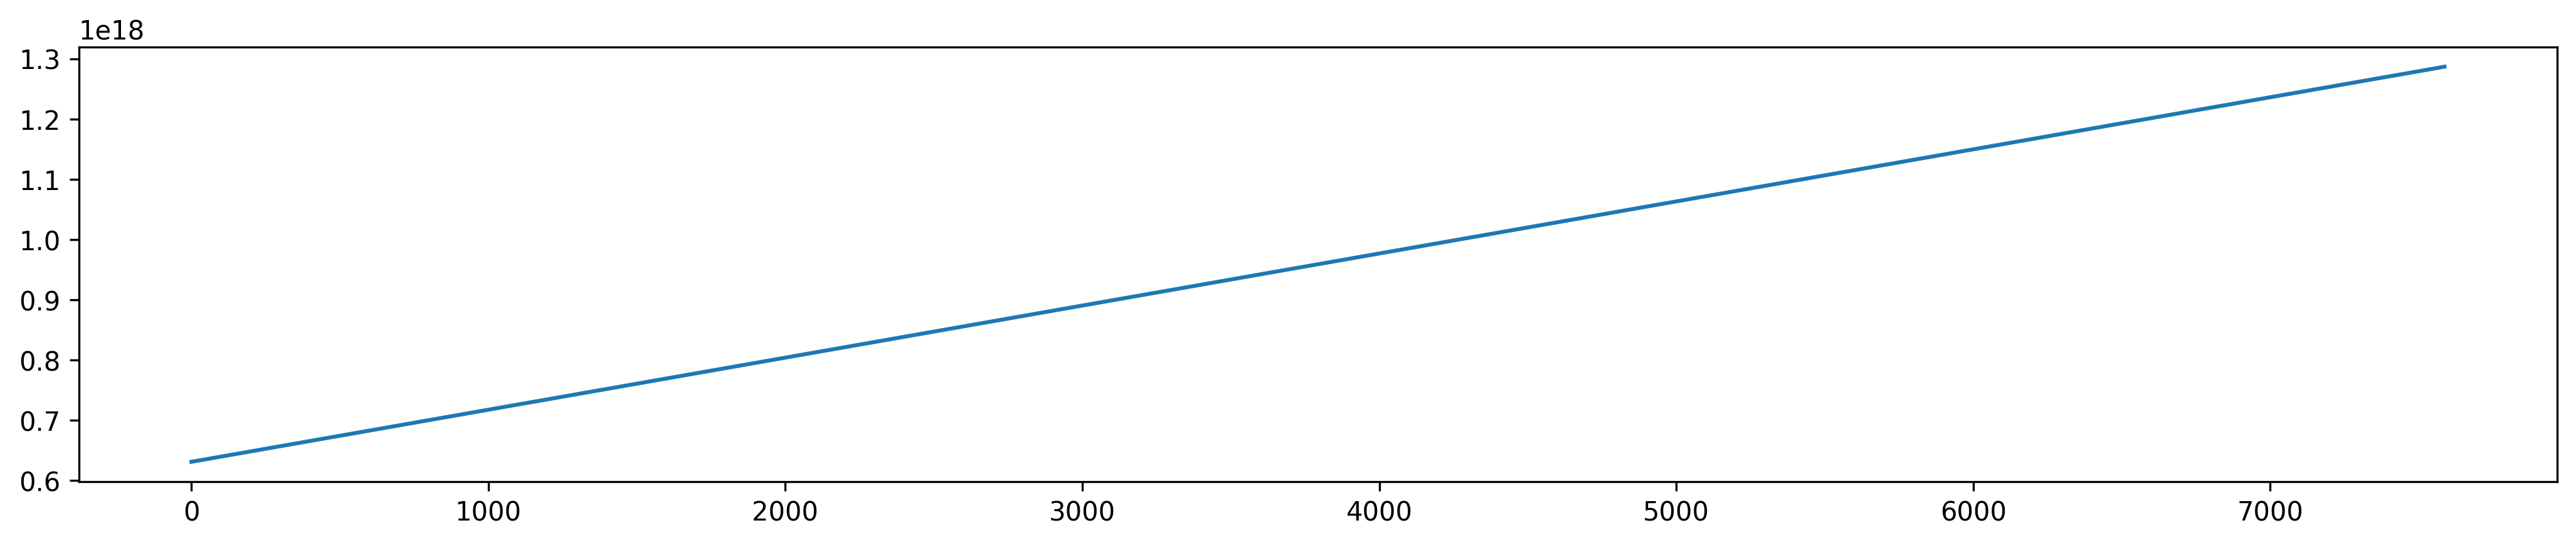

In [12]:
df_date=df[['date']]
plt.plot(df_date)

Time Series Analysis model building & forecasting:

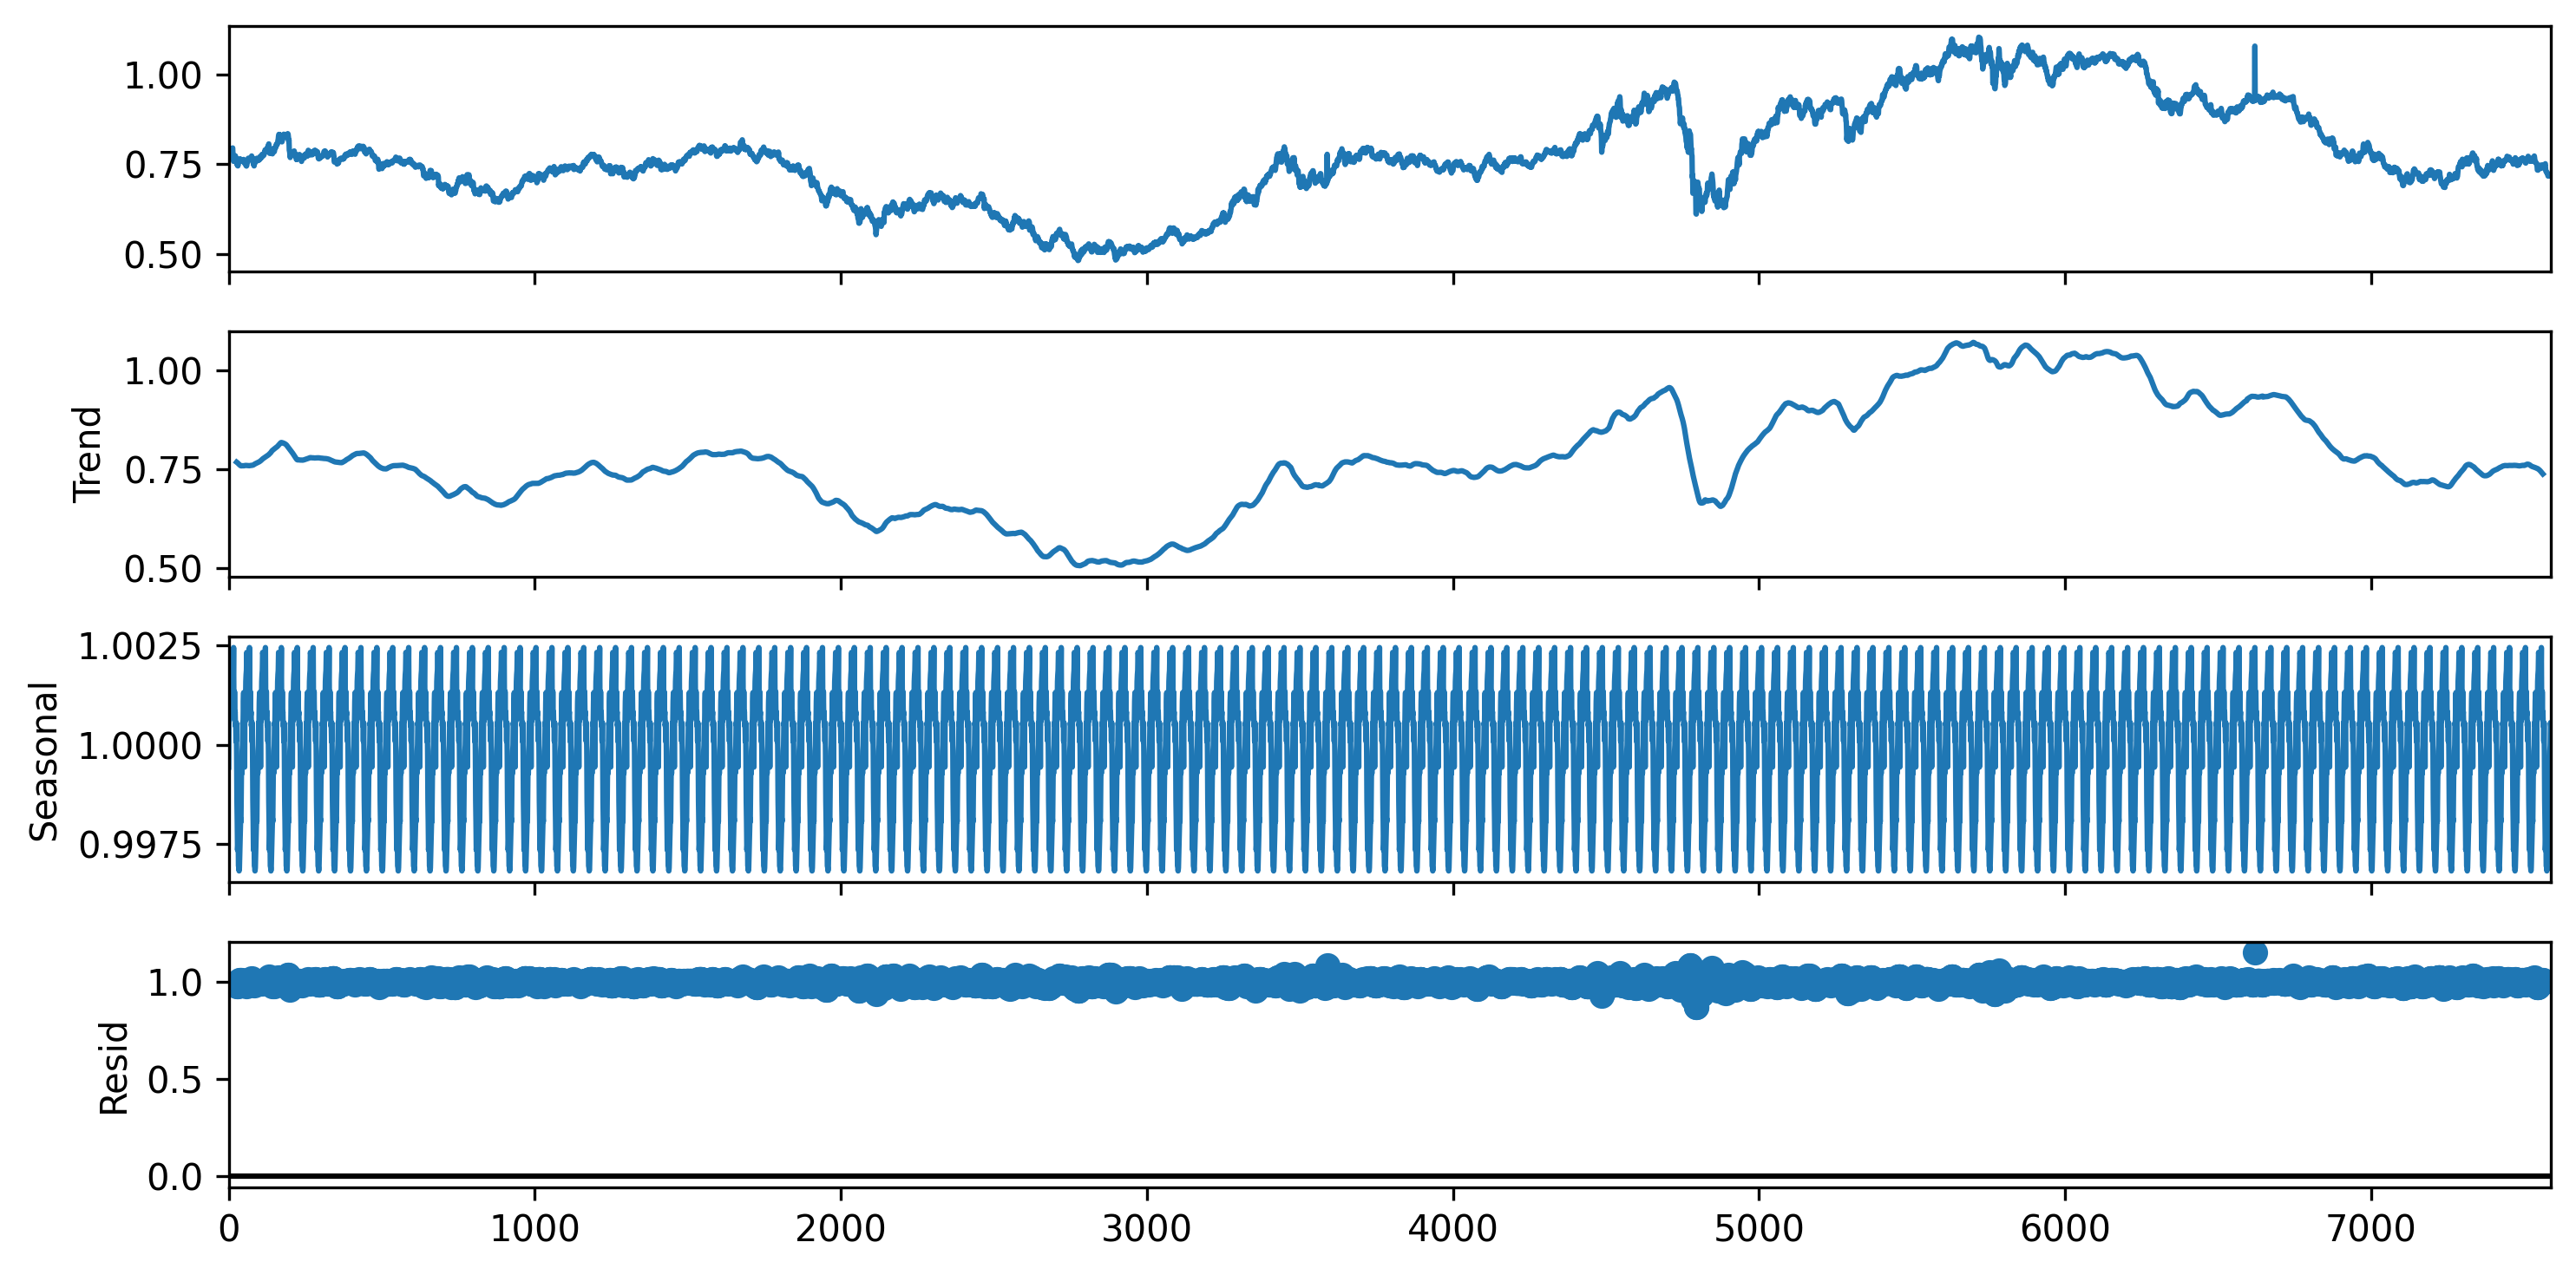

In [13]:
#The decomposition technique is a time series analysis method used to separate a time series into different components to better understand its underlying patterns.

rcParams['figure.figsize'] = 10, 5
decomposition = sm.tsa.seasonal_decompose(df_ex_rate, model='multiplicative', period=52)
fig = decomposition.plot()

In [14]:
#ARIMA models can be applied only in stationary data
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
def stationarity_test(timeseries):
    rolling_mean = timeseries.rolling(window = 52).mean()
    rolling_std = timeseries.rolling(window = 52).std()

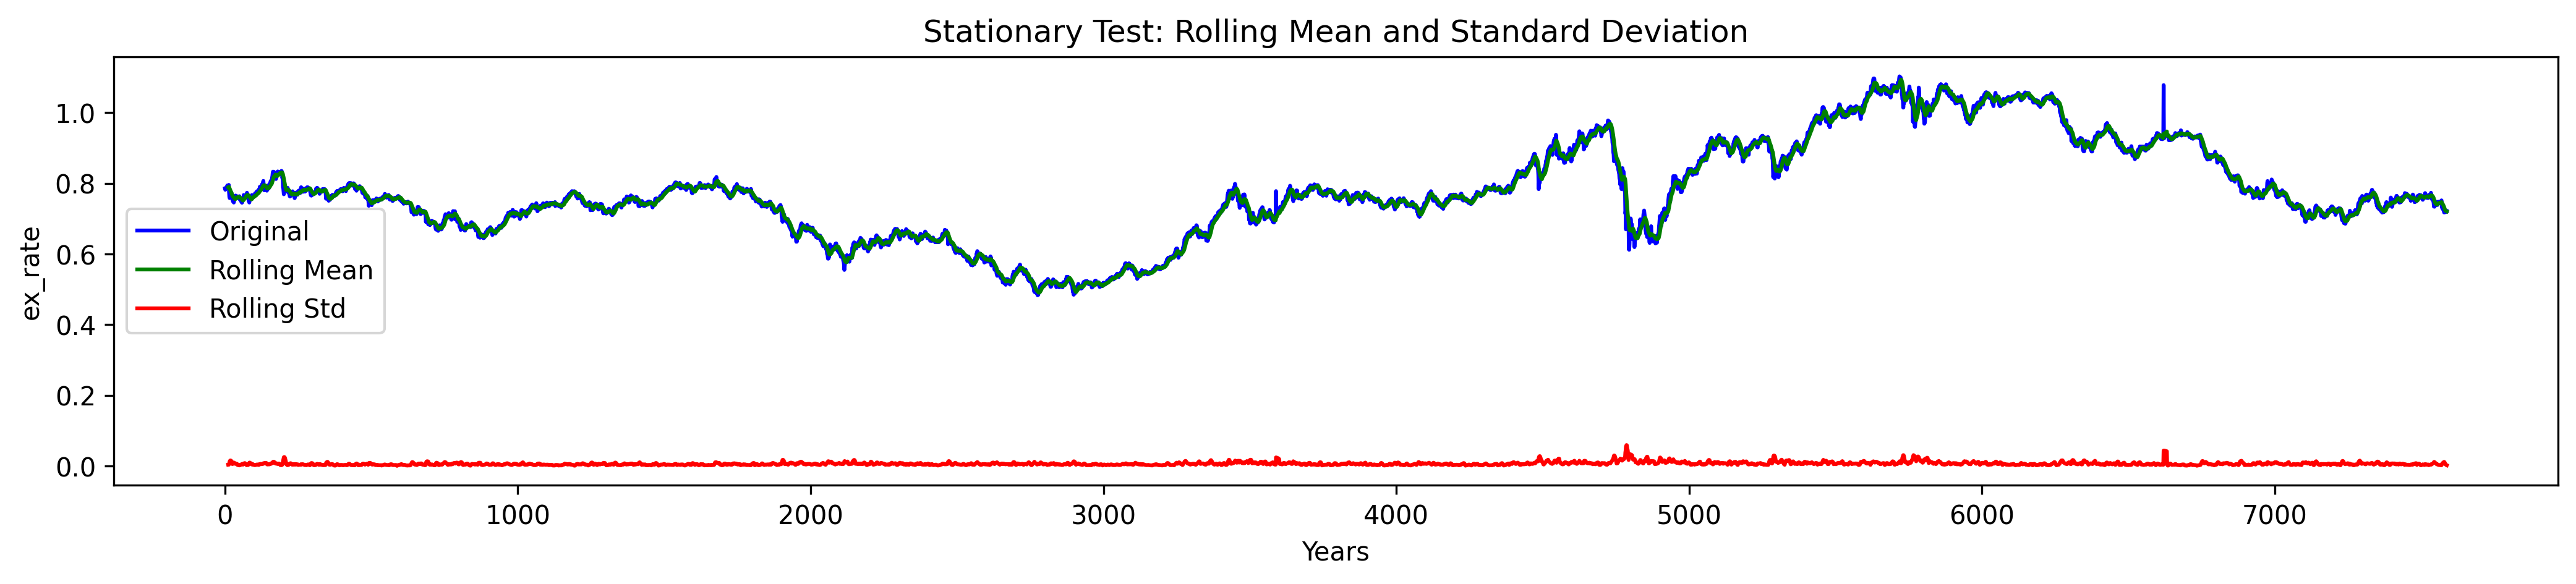

In [15]:
timeseries = df['Ex_rate']
rolling_mean = timeseries.rolling(window=12).mean()
rolling_std = timeseries.rolling(window=12).std()

#Plot rolling statistic
plt.xlabel('Years')
plt.ylabel('ex_rate')
plt.title('Stationary Test: Rolling Mean and Standard Deviation')
plt.plot(timeseries, color= 'blue', label= 'Original')
plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
plt.plot(rolling_std, color= 'red', label= 'Rolling Std')
plt.legend()
plt.show()

Differencing:

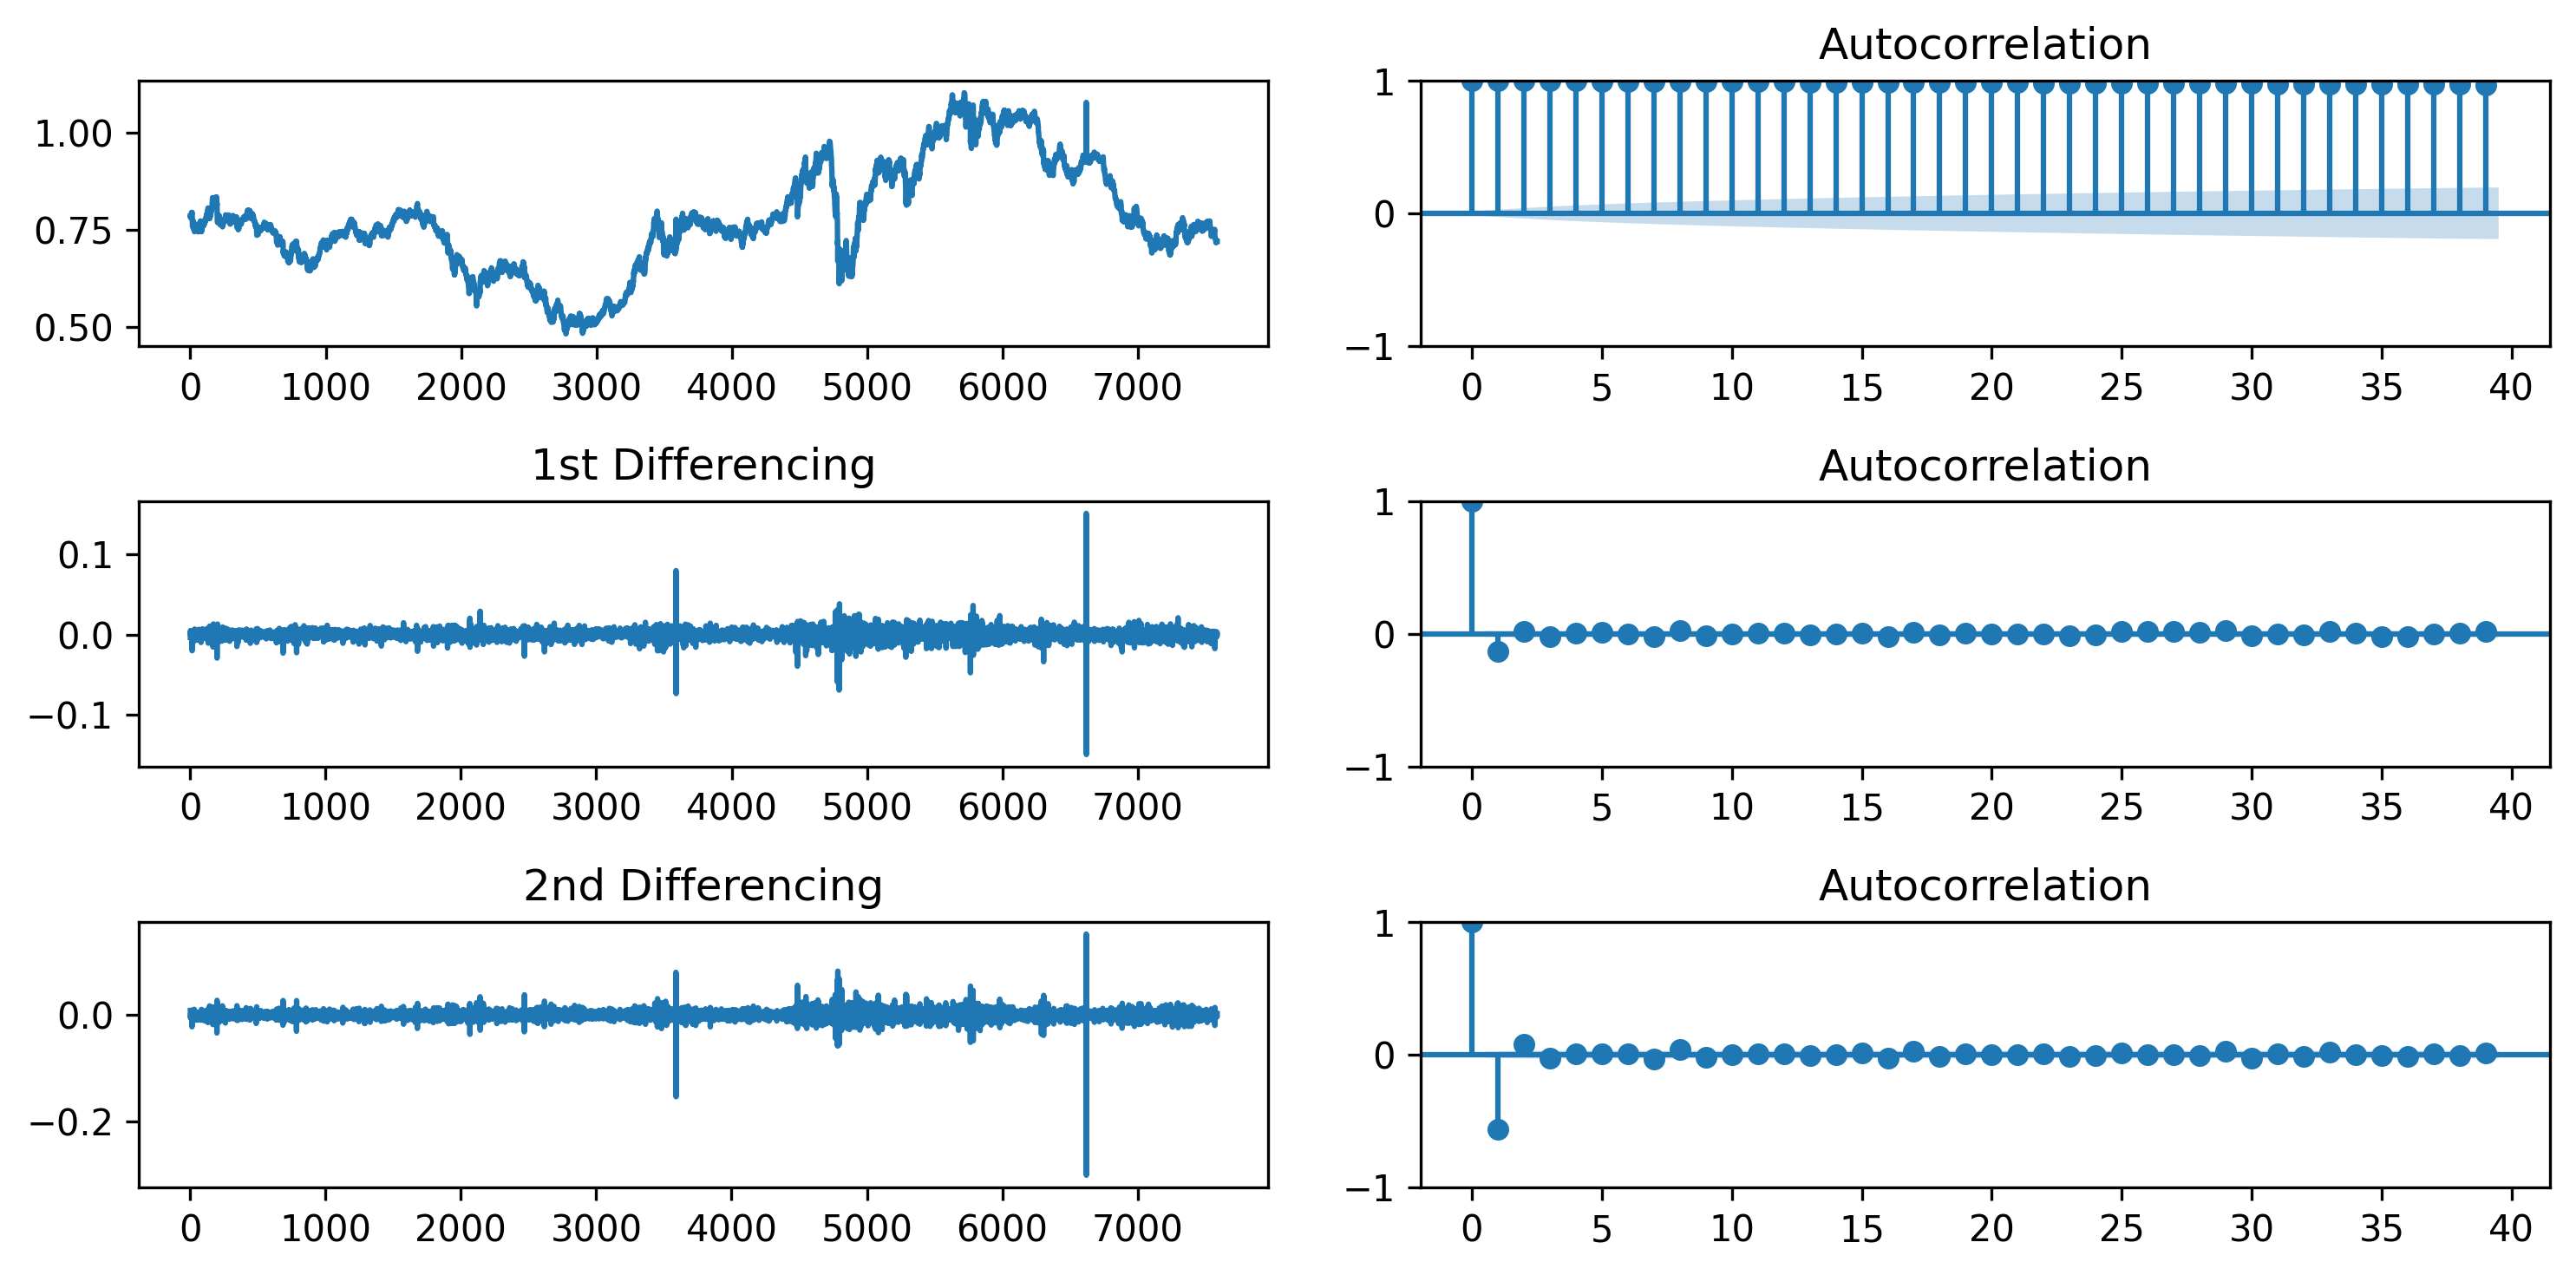

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(10,5))
axes[0, 0].plot(df_ex_rate)
plot_acf(df_ex_rate, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_ex_rate.diff())
plot_acf(df_ex_rate.diff().dropna(), ax=axes[1, 1])
axes[1, 0].set_title('1st Differencing')

#2nd Differencing
axes[2, 0].plot(df_ex_rate.diff().diff())
plot_acf(df_ex_rate.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 0].set_title('2nd Differencing')
plt.tight_layout()

In [17]:
stationarity_test(df_ex_rate.diff().dropna())

ACF and PACF plots:

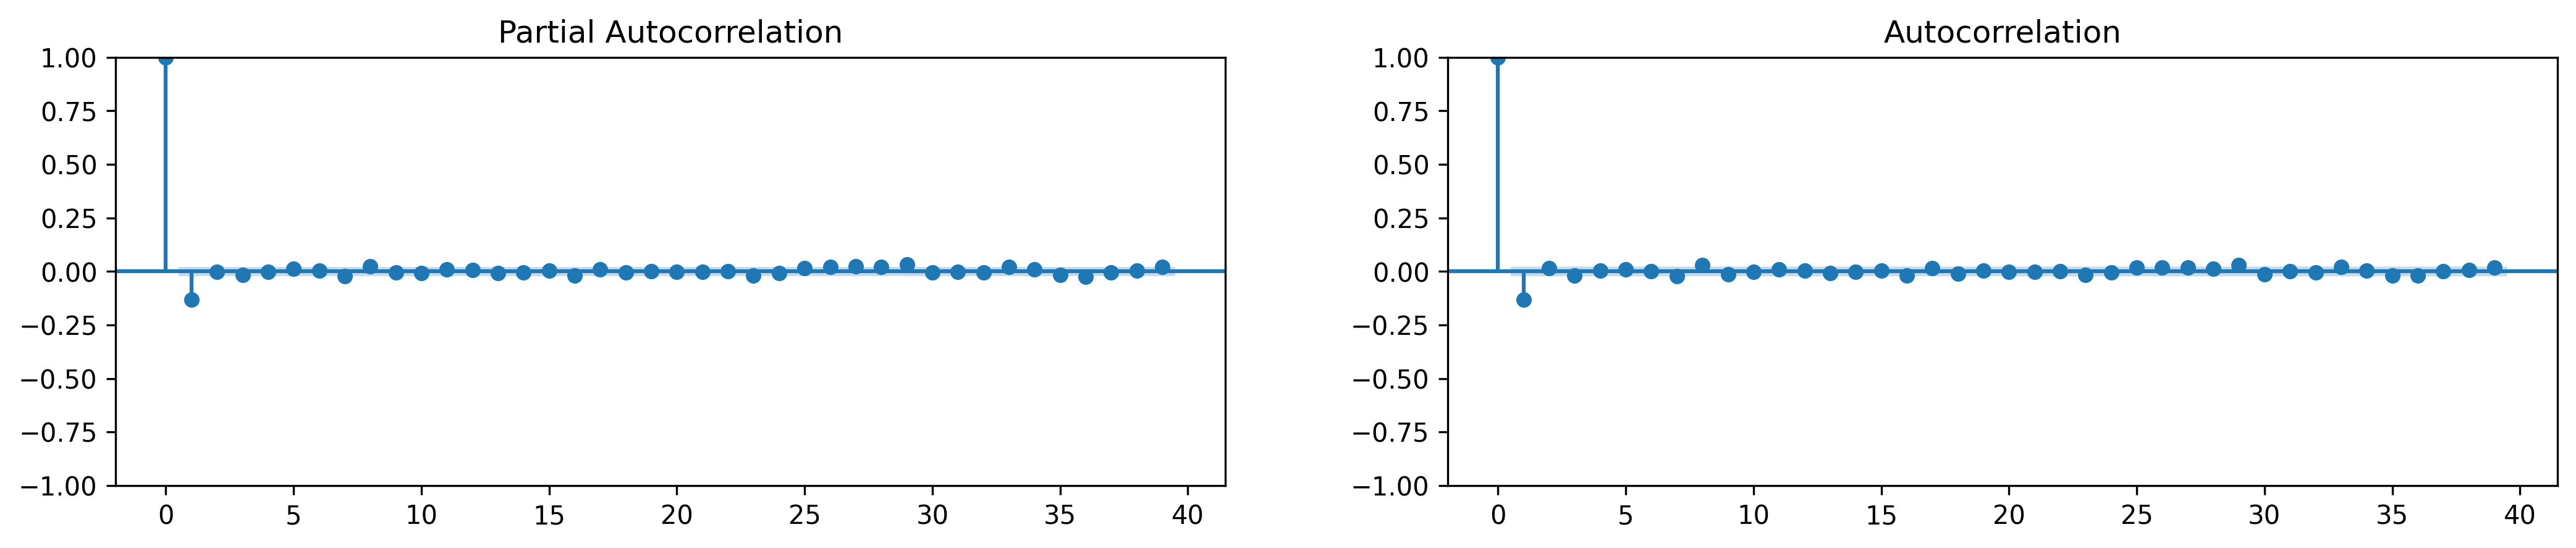

In [18]:
fig, axes = plt.subplots(1, 2)
plot_pacf(df_ex_rate.diff().dropna(), ax=axes[0])
plot_acf(df_ex_rate.diff().dropna(), ax=axes[1])
plt.show()

ARIMA model building:

In [19]:
#base model
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_ex_rate, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 10 Oct 2024   AIC                         -56102.322
Time:                        13:16:39   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
 #model based on chosen p, d, q
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_ex_rate, order=(2,1,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Thu, 10 Oct 2024   AIC                         -56100.135
Time:                        13:16:46   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.978      -1.162       1.129
ma.L2         -0.1135      0.052     -2.172      0.030      -0.216      -0.011
sigma2      3.594e-05   1.01e-07    355.944      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2863303.88
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#The model with parameters based on the ACF and PACF plots have a higher AIC score than the base model.
#We will use a grid search to identify the set of parameters that produces the best fitting model to our time series data,
#optimising for the lowest AIC score.

import itertools

p = [0, 1, 2, 4, 6]
d = range(0, 3)
q = range(0, 3)
optimal_params = None
min_aic = float('inf')
pdq = list(itertools.product(p, d, q))

for param in pdq:
    try:
        model = ARIMA(df_ex_rate, order=param)
        results = model.fit()
        if results.aic < min_aic:
            optimal_params = param
        min_aic = min(min_aic, results.aic)

        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

print(f'Best params: {optimal_params}, min_aic: {min_aic}')


ARIMA(0, 0, 0) - AIC:-8671.758441063394
ARIMA(0, 0, 1) - AIC:-18651.980143971483
ARIMA(0, 0, 2) - AIC:-26735.82559735932
ARIMA(0, 1, 0) - AIC:-55974.195366893764
ARIMA(0, 1, 1) - AIC:-56102.75341206867
ARIMA(0, 1, 2) - AIC:-56101.86424518704
ARIMA(0, 2, 0) - AIC:-49771.265762405674
ARIMA(0, 2, 1) - AIC:-55944.86637992229
ARIMA(0, 2, 2) - AIC:-56075.96099213419
ARIMA(1, 0, 0) - AIC:-55975.96069170836
ARIMA(1, 0, 1) - AIC:-56103.563289300306
ARIMA(1, 0, 2) - AIC:-56102.74878161309
ARIMA(1, 1, 0) - AIC:-56104.31886968435
ARIMA(1, 1, 1) - AIC:-56102.32167370856
ARIMA(1, 1, 2) - AIC:-56101.59099222259
ARIMA(1, 2, 0) - AIC:-52691.67437842345
ARIMA(1, 2, 1) - AIC:-56077.08901834324
ARIMA(1, 2, 2) - AIC:-55975.39599395504
ARIMA(2, 0, 0) - AIC:-56105.21829878942
ARIMA(2, 0, 1) - AIC:-56103.21873325949
ARIMA(2, 0, 2) - AIC:-56102.43066532702
ARIMA(2, 1, 0) - AIC:-56102.32100889373
ARIMA(2, 1, 1) - AIC:-56100.31475499641
ARIMA(2, 1, 2) - AIC:-56100.13533056656
ARIMA(2, 2, 0) - AIC:-53686.61326138

In [26]:
#model based on grid search
model = ARIMA(df_ex_rate, order=optimal_params)
fitted_ARIMA = model.fit()
fitted_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 0, 0)   Log Likelihood               28056.609
Date:                Thu, 10 Oct 2024   AIC                         -56105.218
Time:                        13:35:19   BIC                         -56077.481
Sample:                             0   HQIC                        -56095.699
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.088      8.850      0.000       0.605       0.949
ar.L1          0.8682      0.002    397.265      0.000       0.864       0.872
ar.L2          0.1310      0.002     55.929      0.000       0.126       0.136
sigma2      3.594e-05   1.02e-07    350.716      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2869930.11
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

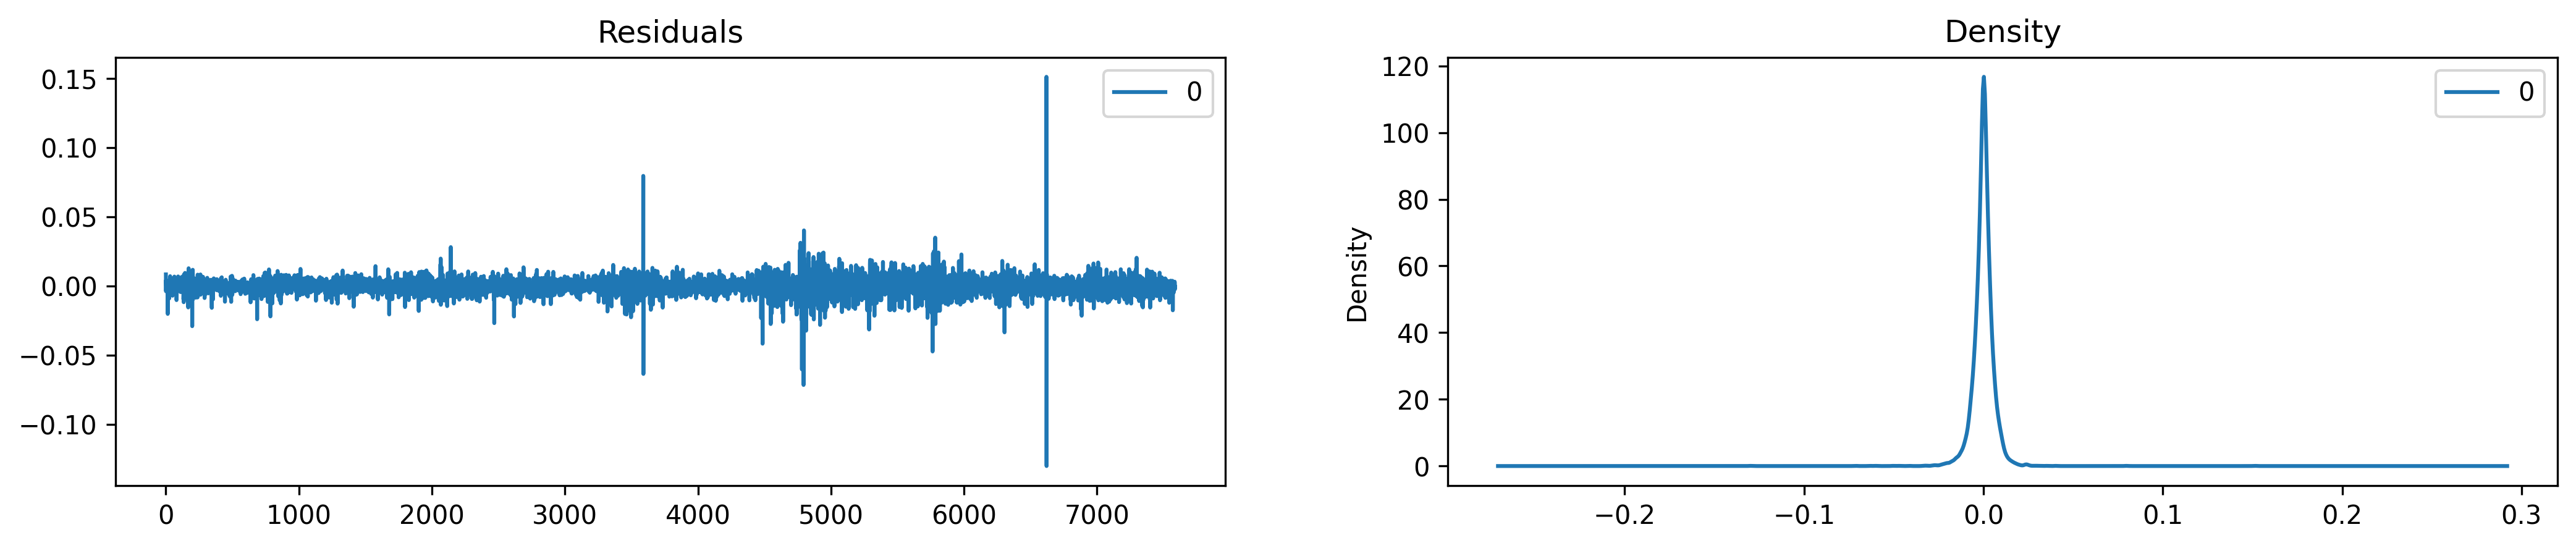

In [27]:
#It is the difference between the original values and the predicted values from the model
residuals = pd.DataFrame(fitted_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

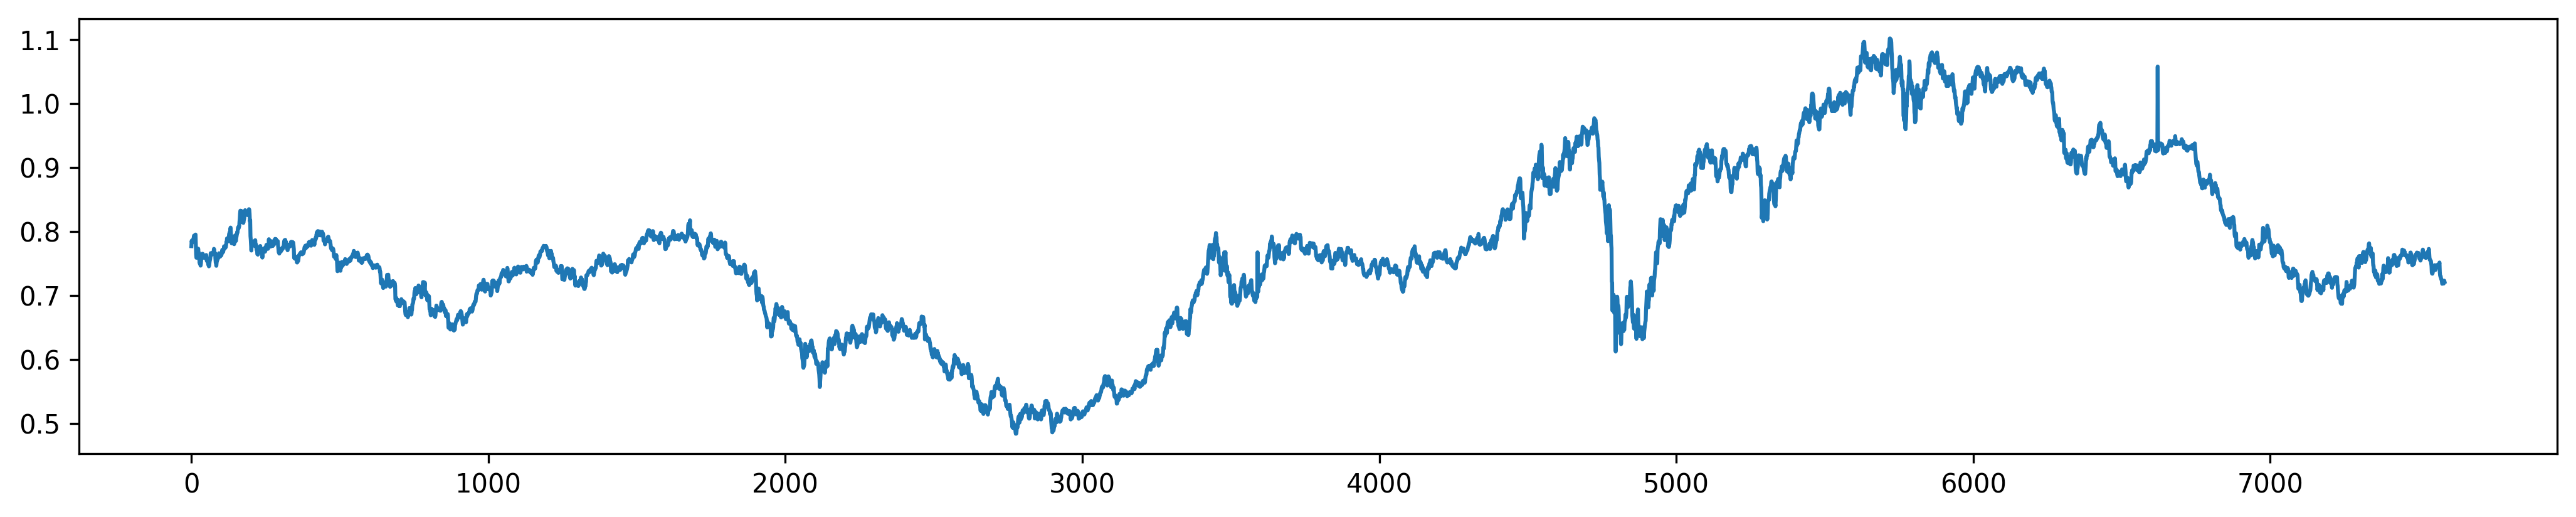

In [29]:
fitted_ARIMA.get_prediction().predicted_mean.plot()
plt.show()

Evalution & Comparison:

In [91]:
# Assuming df_ex_rate is dataset
df_ex_rate.index = pd.to_datetime(df_ex_rate.index)

In [105]:
print(df_ex_rate.head())  # Show the first few rows of the dataset
print(df_ex_rate.index.year.unique())  # Check the unique years in the index

                               Ex_rate
1970-01-01 00:00:00.000000000   0.7855
1970-01-01 00:00:00.000000001   0.7818
1970-01-01 00:00:00.000000002   0.7867
1970-01-01 00:00:00.000000003   0.7860
1970-01-01 00:00:00.000000004   0.7849
Index([1970], dtype='int32')


In [110]:
# Split data into train and test
train = df_ex_rate[df_ex_rate.index.year < 1970]
test = df_ex_rate[df_ex_rate.index.year == 1970]

# Check sizes of train and test sets
print("Size of Training Set:", len(train))
print("Size of Test Set:", len(test))


Size of Training Set: 0
Size of Test Set: 7588


In [111]:
if not train.empty:
    print("Last index of training data:", train.index[-1])
else:
    print("Training data is empty.")

if not test.empty:
    print("First index of test data:", test.index[0])
else:
    print("Test data is empty.")


Training data is empty.
First index of test data: 1970-01-01 00:00:00


In [122]:
# Fit the ARIMA model as train set is not empty
if not train.empty:
    p1, d1, q1 = 1, 1, 1
    fitted_ARIMA1 = ARIMA(train, order=(p1, d1, q1)).fit()

# Forecasting
fc_model = fitted_ARIMA1.get_forecast(steps=len(test))
fc_series_model = pd.Series(fc_model.predicted_mean, index=test.index)

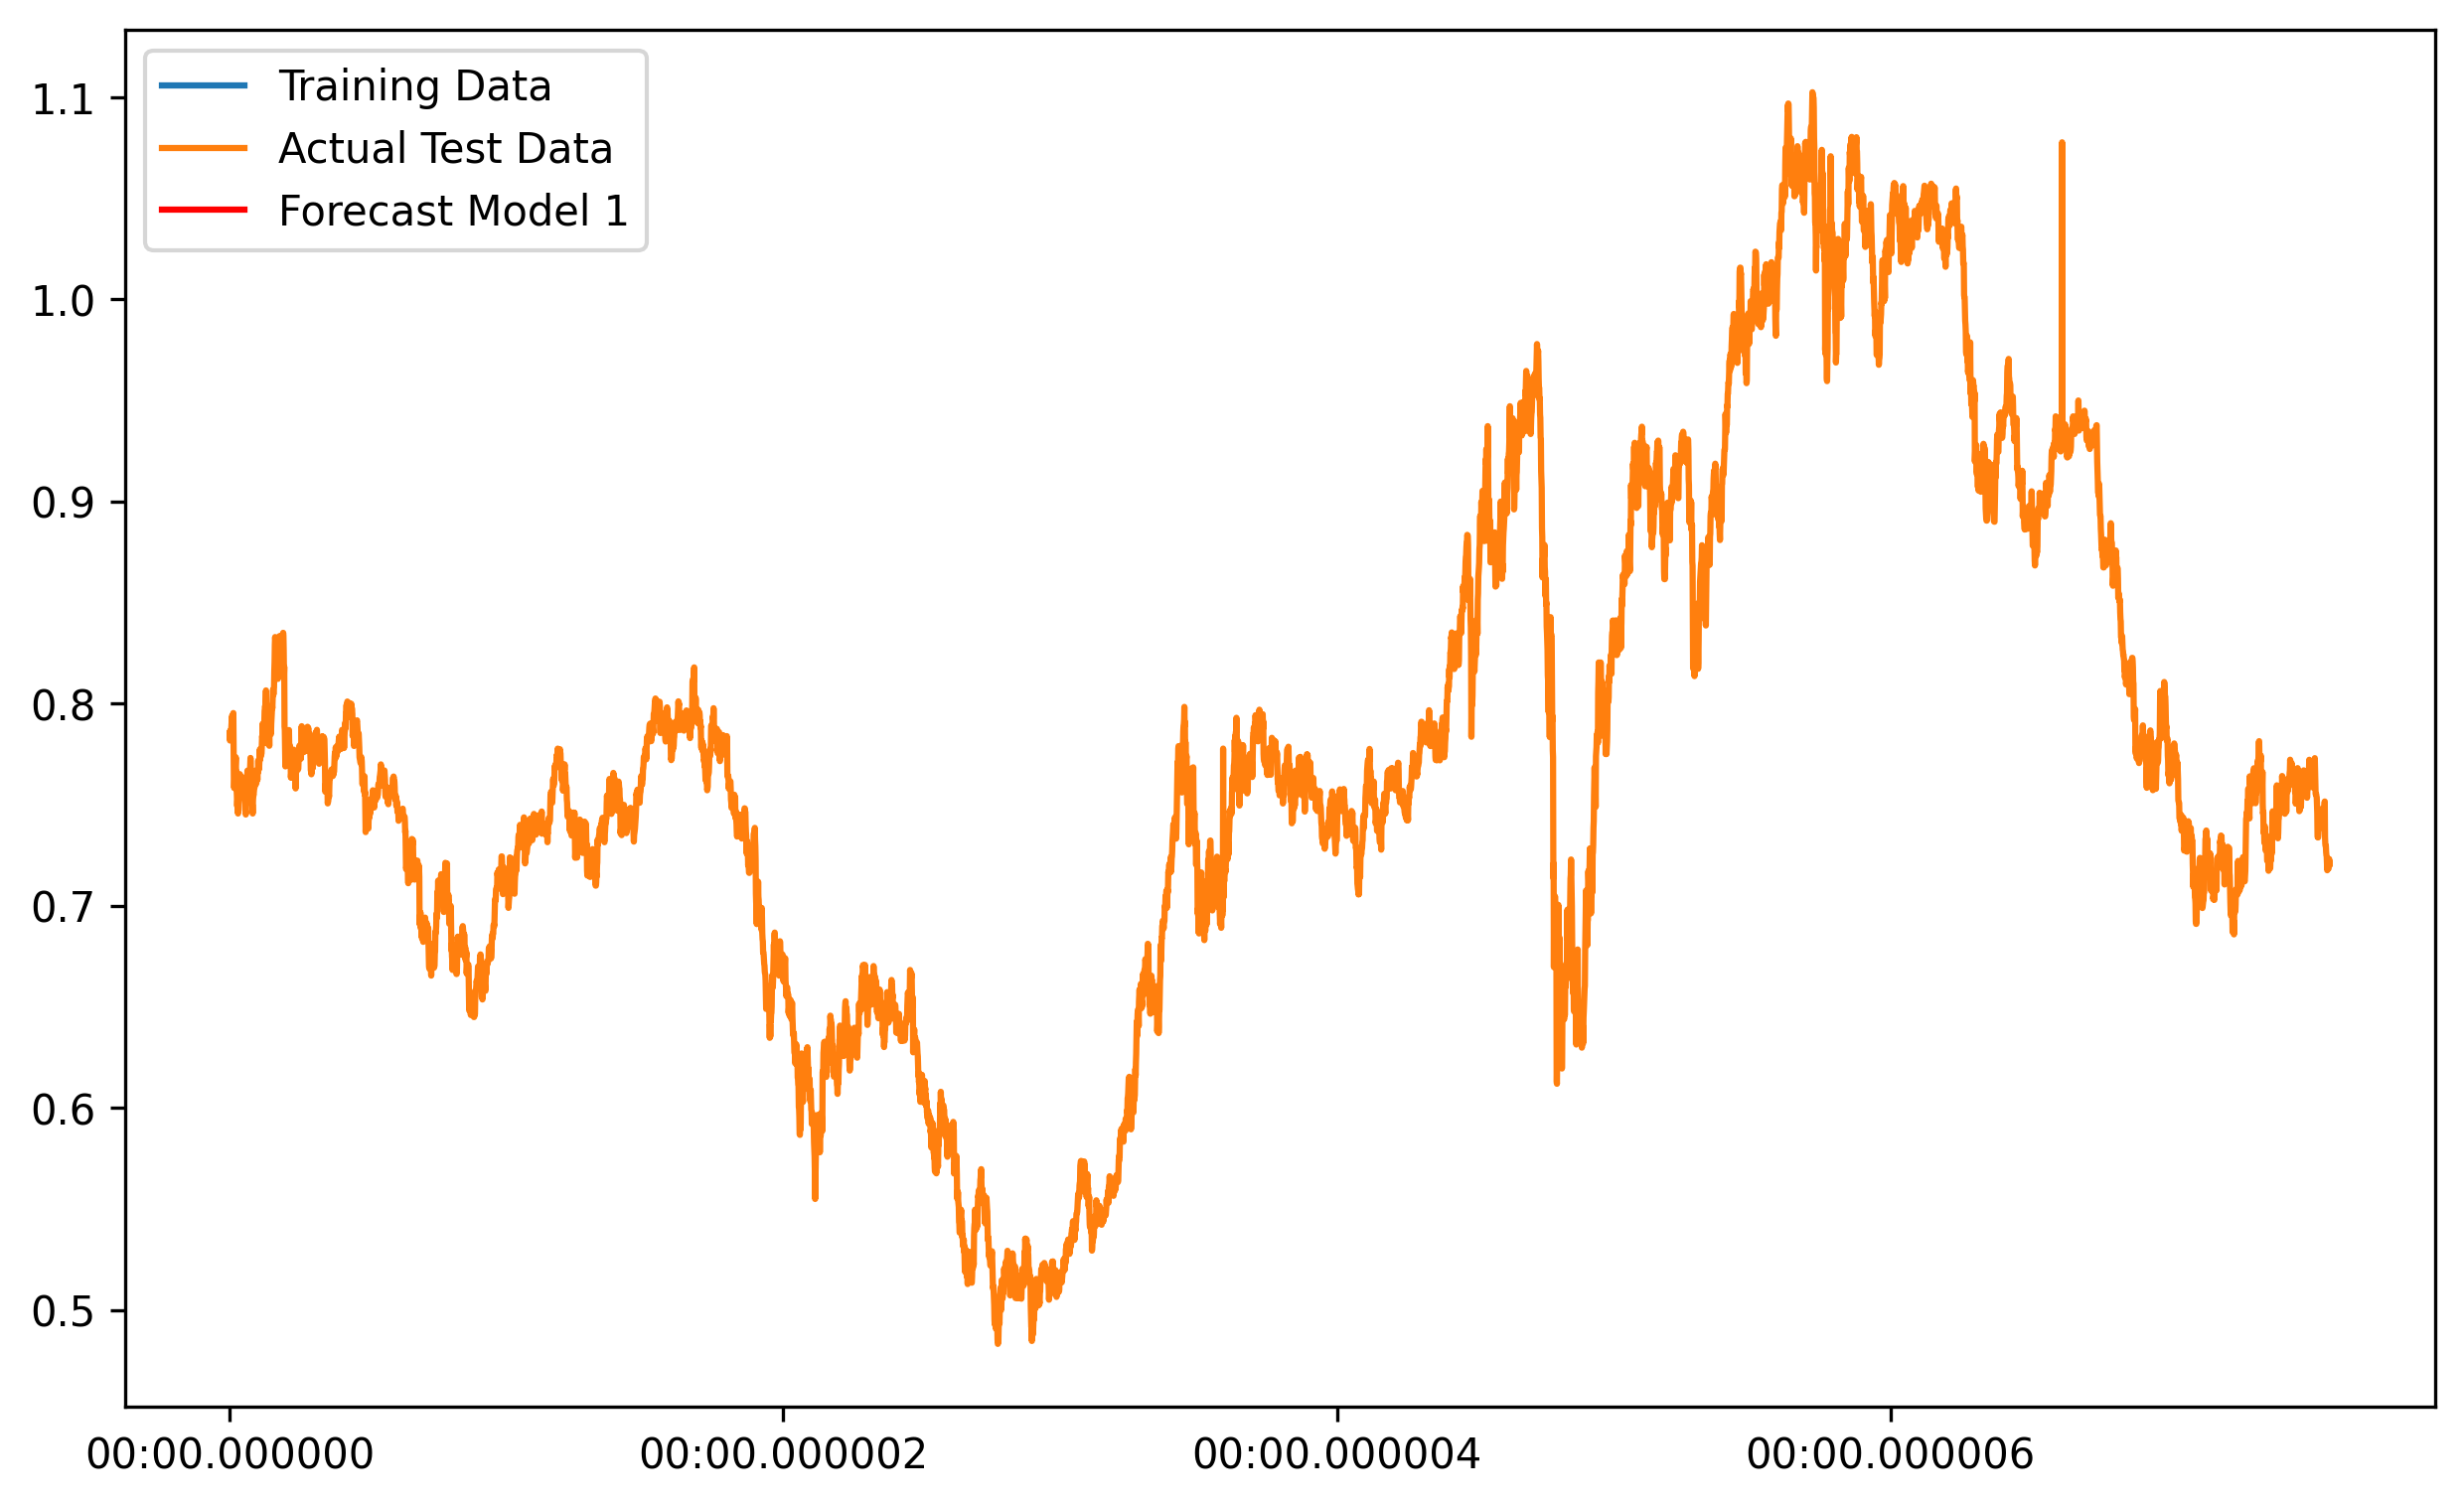

In [123]:
# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train, label='Training Data')
ax.plot(test, label='Actual Test Data')
ax.plot(fc_series_model, label='Forecast Model 1', color='red')
plt.legend()
plt.show()